In [1]:
from analysis import *
from utils import *
from pathlib import Path


params = [
    (2, 40),
    (3, 20),
    (4, 12),
    (5, 10),
    (6, 10)
]


# Slopes 

In [2]:
fig, ax = plt.subplots()

for dim, grid in params:
    path_dir = Path(f"data/d{dim}_g{grid}_c7_cl_nco/data_0.slopes.npy")
    step, slope = load_slope_values(path_dir.__str__())

    draw_slope(slope, step, ax=ax, label=f"dim {dim} grid {grid}")

fig.legend(fontsize="small", loc="lower right", bbox_to_anchor=(0.97, 0.1))


NameError: name 'plt' is not defined

## Visual Assessment of scaling exponents

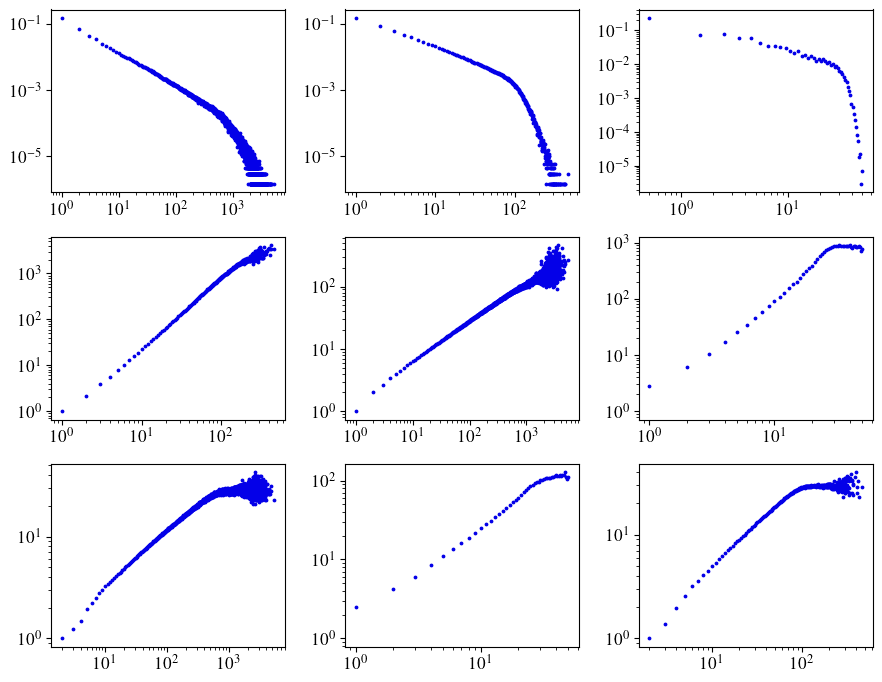

In [2]:
dim, grid = 2, 40
path_dir = Path(f"data/d{dim}_g{grid}_c7_cl_nco")
df = load_combine_avalanche_data_samples(path_dir.__str__())

fig, ax = plt.subplots(3, 3, figsize=(9, 7))
for i, obs in enumerate("size time reach".split()):
    if obs == "reach":
        bins = 50
    else:
        bins = None
    x, y = get_hist(df[obs], bins=bins)
    draw_distribution(x, y, axis=ax[0, i], s=3)
    
comb = [
    "size time".split(),
    "time size".split(),
    "size reach".split(),
    "reach size".split(),
    "time reach".split(),
    "reach time".split()
]

indices = [
    (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2) 
]

for index, (xn, yn) in zip(indices, comb):
    x, y = get_conditional_expectation(df[xn], df[yn])
    draw_distribution(x, y, axis=ax[*index])  
   


# Calculate the scaling exponents

In [3]:
dim, grid = 2, 40
path_dir = Path(f"data/d{dim}_g{grid}_c7_cl_nco")
df = calculate_all_scaling_exponents(path_dir, [
    (None, 100), (None, 150), (1, 11), 
    (None, 105), (10, 1_000), (3, 10.5),
    (10.5, 150), (3, 10.5), (10, 80)])

df

,tau,alpha,lambda,gamma1,1/gamma1,gamma2,1/gamma2,gamma3,1/gamma3
0,1.997139,2.306299,1.69487,1.533976,0.606319,1.815585,0.54045,1.170726,0.786353
